# UNDERSTANDING THE PROBLEM
## **Restating the Goal:**

The objective is to develop a predictive model that identifies e-commerce users at risk of churning. By analyzing user behavior data, we aim to detect patterns indicative of potential disengagement, enabling proactive retention strategies to enhance customer loyalty and reduce attrition.

## **Interpreting the Research Paper's Concepts in This Context:**

The research paper "In Pursuit of Enhanced Customer Retention Management" by Eva Ascarza et al. discusses advanced strategies for customer retention, emphasizing the importance of understanding customer behavior and the effectiveness of targeted interventions. 
COLUMBIA BUSINESS SCHOOL

## # Key insights from the paper relevant to our context include:

Behavioral Analysis: Understanding the nuances of customer interactions is crucial. In the e-commerce setting, this translates to analyzing metrics such as purchase frequency, browsing habits, and engagement levels to identify signs of potential churn.

Targeted Interventions: The paper highlights that interventions should be tailored based on customer behavior. For our model, this means not only identifying at-risk users but also understanding the specific behaviors leading to churn, allowing for personalized retention strategies.

# **Data Inspection & Preprocessing: Cleaning and Organizing the Dataset**

In [4]:
import pandas as pd
import numpy as np
from datetime import datetime


# Load and inspect the dataset
data_path = "events.csv"
data = pd.read_csv(data_path)
print("Initial Data Overview:")
print(data.info())
print(data.head())


# Handle missing values
data.fillna({'category_code': 'unknown', 'brand': 'unknown'}, inplace=True)
data.dropna(subset=['user_session'], inplace=True)
print("Missing values after handling:")
print(data.isnull().sum())

# Remove duplicates
data.drop_duplicates(inplace=True)
print("Shape after removing duplicates:", data.shape)

# Parse event_time and sort data
data['event_time'] = pd.to_datetime(data['event_time'], errors='coerce')
data.sort_values(by='event_time', inplace=True)

# Ensure proper data types
data['price'] = pd.to_numeric(data['price'], errors='coerce').fillna(0)
print("Data types after corrections:")
print(data.dtypes)

# Save the cleaned dataset
data.to_csv("cleaned_events.csv", index=False)

Initial Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 885129 entries, 0 to 885128
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   event_time     885129 non-null  object 
 1   event_type     885129 non-null  object 
 2   product_id     885129 non-null  int64  
 3   category_id    885129 non-null  int64  
 4   category_code  648910 non-null  object 
 5   brand          672765 non-null  object 
 6   price          885129 non-null  float64
 7   user_id        885129 non-null  int64  
 8   user_session   884964 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 60.8+ MB
None
                event_time event_type  product_id          category_id  \
0  2020-09-24 11:57:06 UTC       view     1996170  2144415922528452715   
1  2020-09-24 11:57:26 UTC       view      139905  2144415926932472027   
2  2020-09-24 11:57:27 UTC       view      215454  2144415927158964449   
3  2020-

# **Exploratory Data Analysis (EDA)**

## Steps for EDA:
**STEP1 :Event Type Analysis**

Distribution of event types (view, cart, purchase).
Trend of event types over time.

C:\Users\FARAZ GHANI\AppData\Local\Temp\ipykernel_20196\2007648283.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=event_type_counts.index, y=event_type_counts.values, palette="viridis")


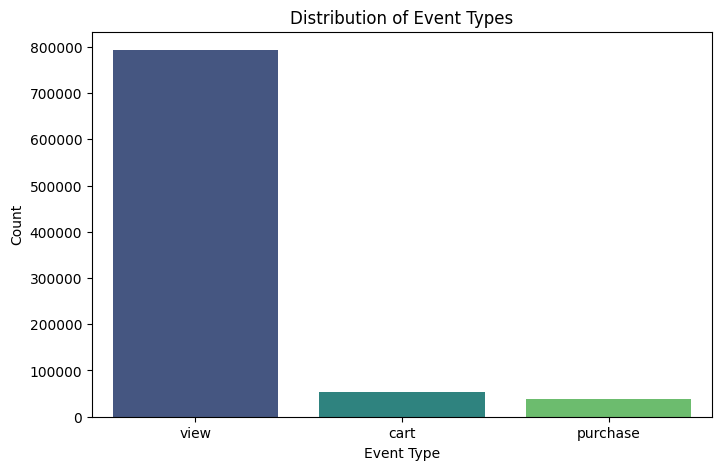

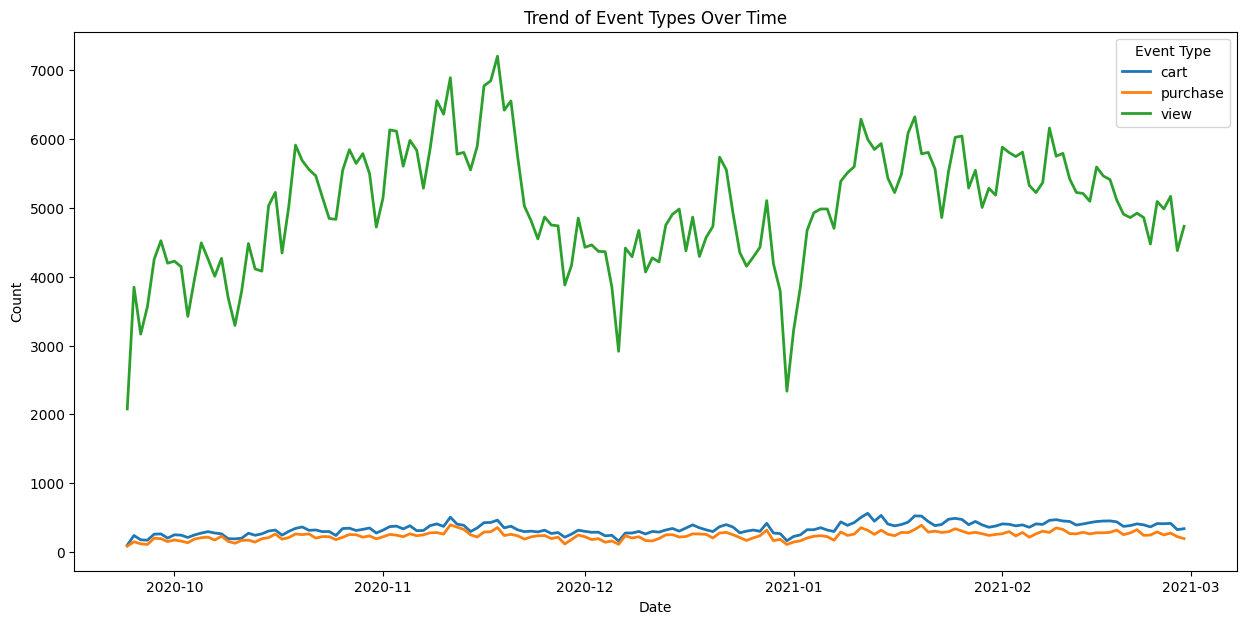

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of event types
event_type_counts = data['event_type'].value_counts()
plt.figure(figsize=(8, 5))
sns.barplot(x=event_type_counts.index, y=event_type_counts.values, palette="viridis")
plt.title("Distribution of Event Types")
plt.xlabel("Event Type")
plt.ylabel("Count")
plt.show()

# Trend of event types over time
data['event_date'] = data['event_time'].dt.date
event_trend = data.groupby(['event_date', 'event_type']).size().unstack().fillna(0)

plt.figure(figsize=(15, 7))
event_trend.plot(ax=plt.gca(), linewidth=2)
plt.title("Trend of Event Types Over Time")
plt.xlabel("Date")
plt.ylabel("Count")
plt.legend(title="Event Type")
plt.show()


# Distribution of Event Types:

1.The dataset has a clear imbalance in event types. "View" events dominate, while "Cart" and "Purchase" events are relatively infrequent.

2.This suggests that many users explore products but do not necessarily add them to the cart or proceed to purchase. 

## Trend of Event Types Over Time:

1."View" events have a steady increase with some fluctuations, indicating user activity is consistent and growing over time.

2."Cart" and "Purchase" events show minor variations but remain much lower in volume compared to "View" events.

# **Step 2 :Brand and Category Analysis**

In [6]:
# Analyze top brands and categories by frequency and revenue

# Top brands by frequency
top_brands_freq = data['brand'].value_counts().head(10)

# Top categories by frequency
top_categories_freq = data['category_code'].value_counts().head(10)

# Top brands by revenue (considering 'purchase' events and 'price')
top_brands_revenue = (
    data[data['event_type'] == 'purchase']
    .groupby('brand')['price']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

# Top categories by revenue
top_categories_revenue = (
    data[data['event_type'] == 'purchase']
    .groupby('category_code')['price']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

# Display results
top_brands_freq, top_categories_freq, top_brands_revenue, top_categories_revenue


(brand
 unknown      212194
 asus          27657
 gigabyte      27652
 msi           24863
 palit         24786
 samsung       23178
 amd           20092
 canon         18429
 panasonic     11972
 pioneer       11463
 Name: count, dtype: int64,
 category_code
 unknown                             236001
 computers.components.videocards     116606
 electronics.telephone                84291
 computers.peripherals.printer        43188
 stationery.cartrige                  38693
 electronics.audio.acoustic           26747
 computers.components.motherboard     26581
 computers.notebook                   25017
 computers.components.cpu             24745
 electronics.video.tv                 21367
 Name: count, dtype: int64,
 brand
 msi           643492.34
 unknown       594720.15
 gigabyte      556183.04
 palit         484210.58
 asus          330147.11
 sapphire      306192.94
 amd           191987.40
 canon         137964.79
 powercolor     98804.38
 epson          98262.95
 Name: price, d

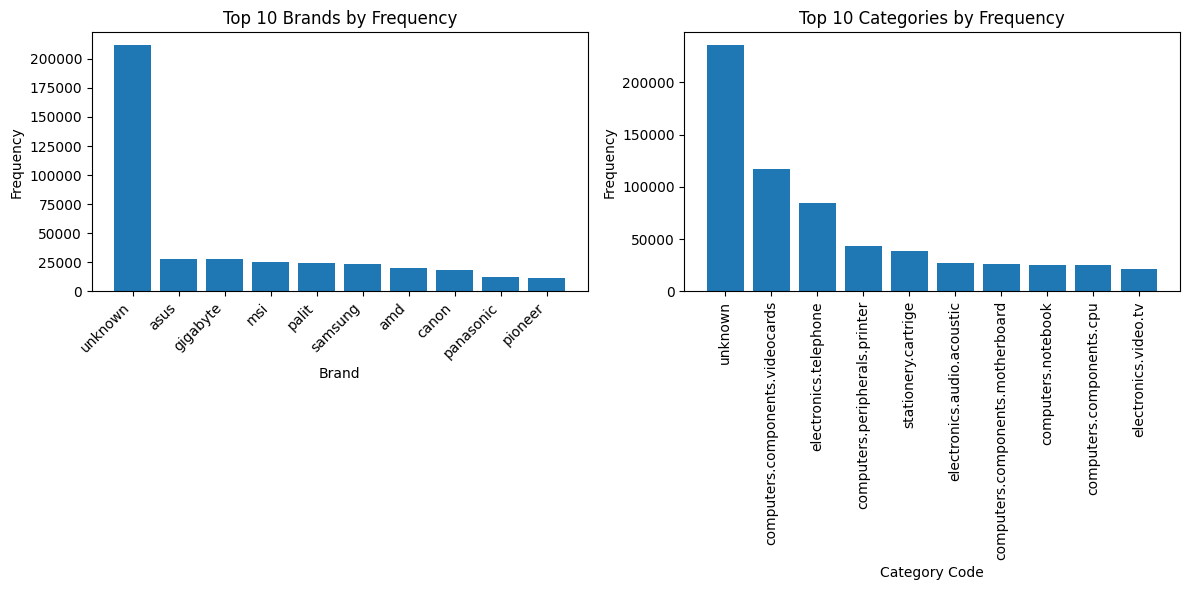

In [7]:
import matplotlib.pyplot as plt

# Prepare data for plotting (assuming top_brands_freq and top_categories_freq are DataFrames)
brand_labels = top_brands_freq.index.to_numpy()
category_labels = top_categories_freq.index.to_numpy()
brand_counts = top_brands_freq.values
category_counts = top_categories_freq.values

# Create subplots for brand and category frequency
plt.figure(figsize=(12, 6))

# Brand frequency plot
plt.subplot(1, 2, 1)
plt.bar(brand_labels[:10], brand_counts[:10])  # Plot top 10 brands
plt.xlabel("Brand")
plt.ylabel("Frequency")
plt.title("Top 10 Brands by Frequency")
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for readability

# Category frequency plot
plt.subplot(1, 2, 2)
plt.bar(category_labels[:10], category_counts[:10])  # Plot top 10 categories
plt.xlabel("Category Code")
plt.ylabel("Frequency")
plt.title("Top 10 Categories by Frequency")
plt.xticks(rotation=90)  # Rotate x-axis labels for readability

plt.tight_layout()  # Adjust spacing between subplots
plt.show()

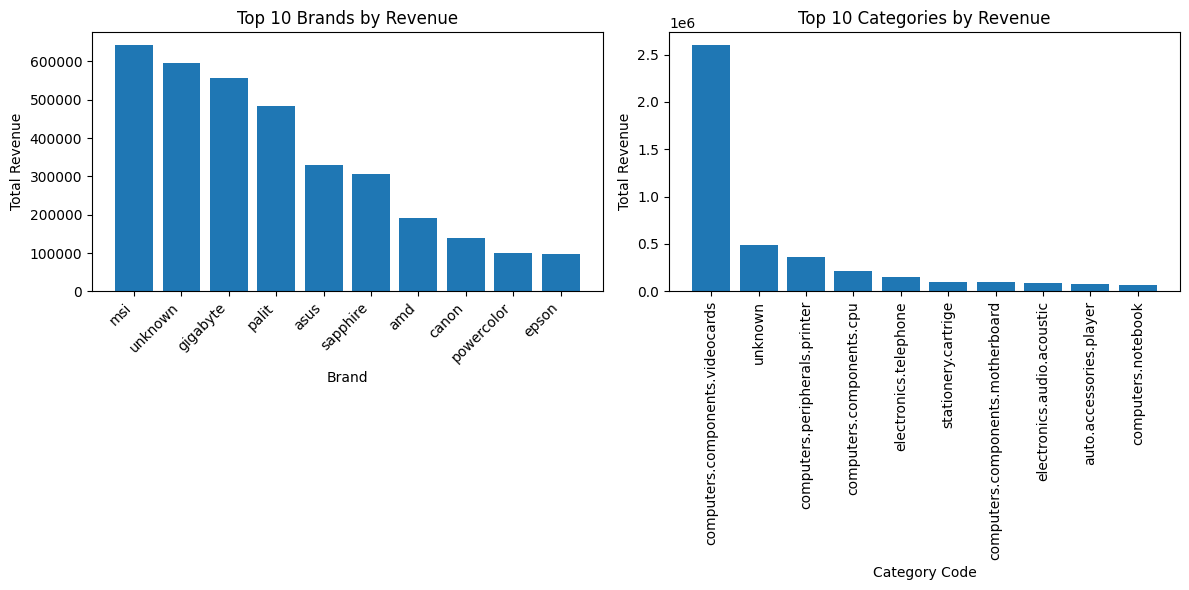

In [8]:
# Prepare data for plotting (assuming top_brands_revenue and top_categories_revenue are DataFrames)
brand_labels = top_brands_revenue.index.to_numpy()
category_labels = top_categories_revenue.index.to_numpy()
brand_revenue = top_brands_revenue.values
category_revenue = top_categories_revenue.values

# Create subplots for brand and category revenue
plt.figure(figsize=(12, 6))

# Brand revenue plot
plt.subplot(1, 2, 1)
plt.bar(brand_labels[:10], brand_revenue[:10])  # Plot top 10 brands
plt.xlabel("Brand")
plt.ylabel("Total Revenue")
plt.title("Top 10 Brands by Revenue")
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for readability

# Category revenue plot
plt.subplot(1, 2, 2)
plt.bar(category_labels[:10], category_revenue[:10])  # Plot top 10 categories
plt.xlabel("Category Code")
plt.ylabel("Total Revenue")
plt.title("Top 10 Categories by Revenue")
plt.xticks(rotation=90)  # Rotate x-axis labels for readability

plt.tight_layout()  # Adjust spacing between subplots
plt.show()

# User Activity Patterns (Sessions per User)

Visualize the distribution of sessions per user.

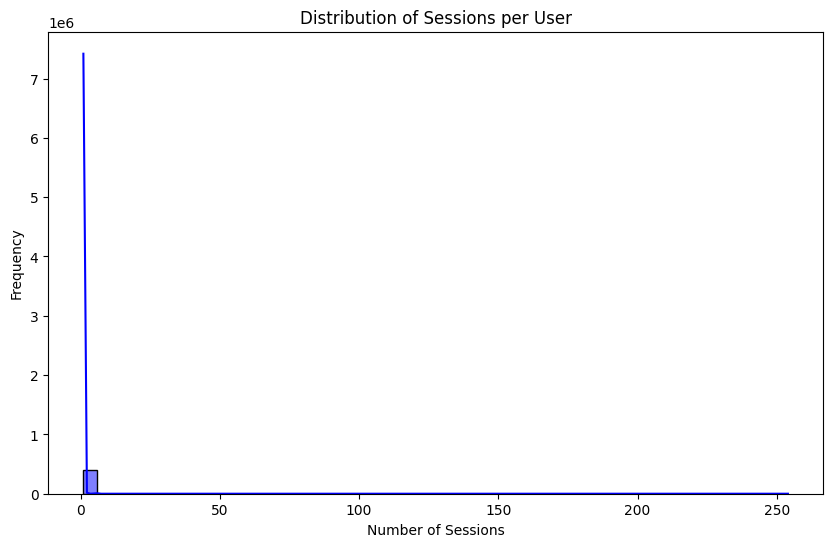

In [9]:
# Count the number of sessions per user
sessions_per_user = data.groupby('user_id')['user_session'].nunique()

# Plot the distribution
plt.figure(figsize=(10, 6))
sns.histplot(sessions_per_user, bins=50, kde=True, color='blue')
plt.title("Distribution of Sessions per User")
plt.xlabel("Number of Sessions")
plt.ylabel("Frequency")
plt.show()


Image indicates that the distribution of sessions per user is highly skewed, with most users having only a small number of sessions. This implies that a majority of users are not highly engaged, with relatively few users having a higher frequency of sessions.

To better understand this behavior and gain deeper insights, you can apply the following steps:

**Log-Transform the Data**: Since the data is highly skewed, applying a log transformation can provide a better visualization of the distribution.




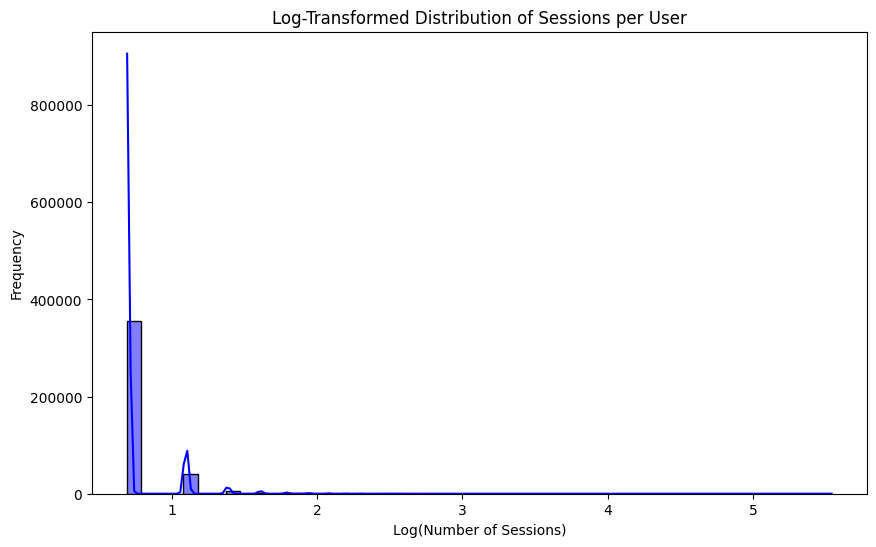

In [10]:
# Count the number of sessions per user
sessions_per_user = data.groupby('user_id')['user_session'].nunique()

# Apply log transformation
sessions_per_user_log = np.log1p(sessions_per_user)

# Plot the log-transformed distribution
plt.figure(figsize=(10, 6))
sns.histplot(sessions_per_user_log, bins=50, kde=True, color='blue')
plt.title("Log-Transformed Distribution of Sessions per User")
plt.xlabel("Log(Number of Sessions)")
plt.ylabel("Frequency")
plt.show()



## **Concentration Around Low Values:**

Most users have a very low log-transformed session count, suggesting they participate in only a few sessions.
Long Tail:



There is a long tail toward higher log values, indicating a small subset of highly active users with many sessions.

# **Price Distribution**

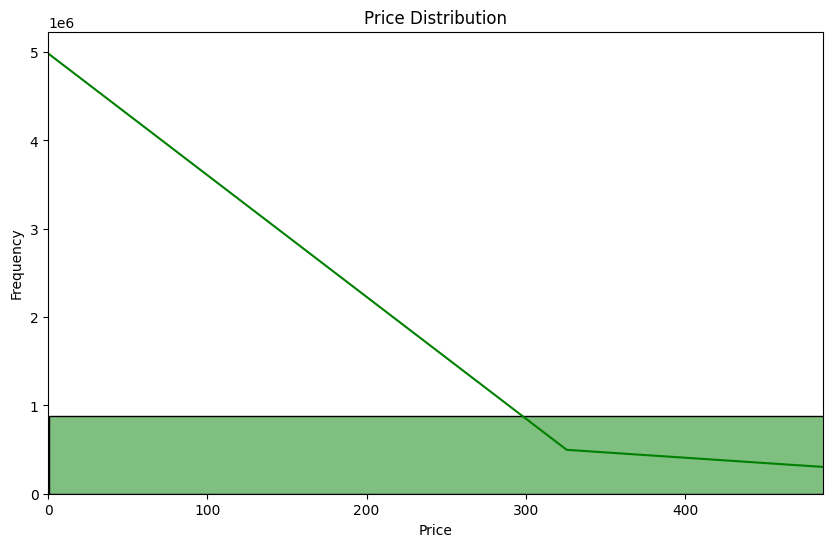

In [11]:
# Plot the price distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['price'], bins=50, kde=True, color='green')
plt.title("Price Distribution")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.xlim(0, data['price'].quantile(0.95))  # Limit outliers for better visualization
plt.show()


To better interpret and analyze the data, applying a log transformation can help normalize the distribution and make trends more visible. 

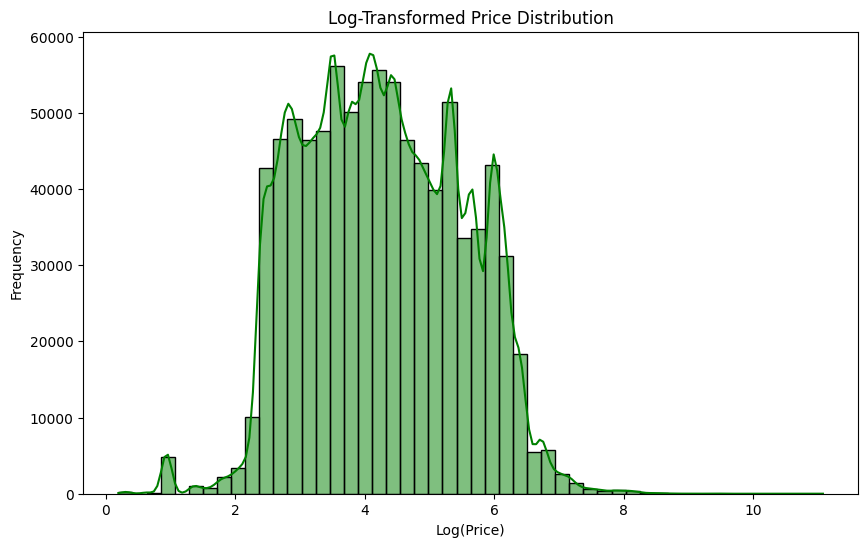

In [12]:
# Apply log transformation to prices (assuming the column is 'price')
data['log_price'] = np.log1p(data['price'])

# Plot the log-transformed price distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['log_price'], bins=50, kde=True, color='green')
plt.title("Log-Transformed Price Distribution")
plt.xlabel("Log(Price)")
plt.ylabel("Frequency")
plt.show()


# User-level summaries

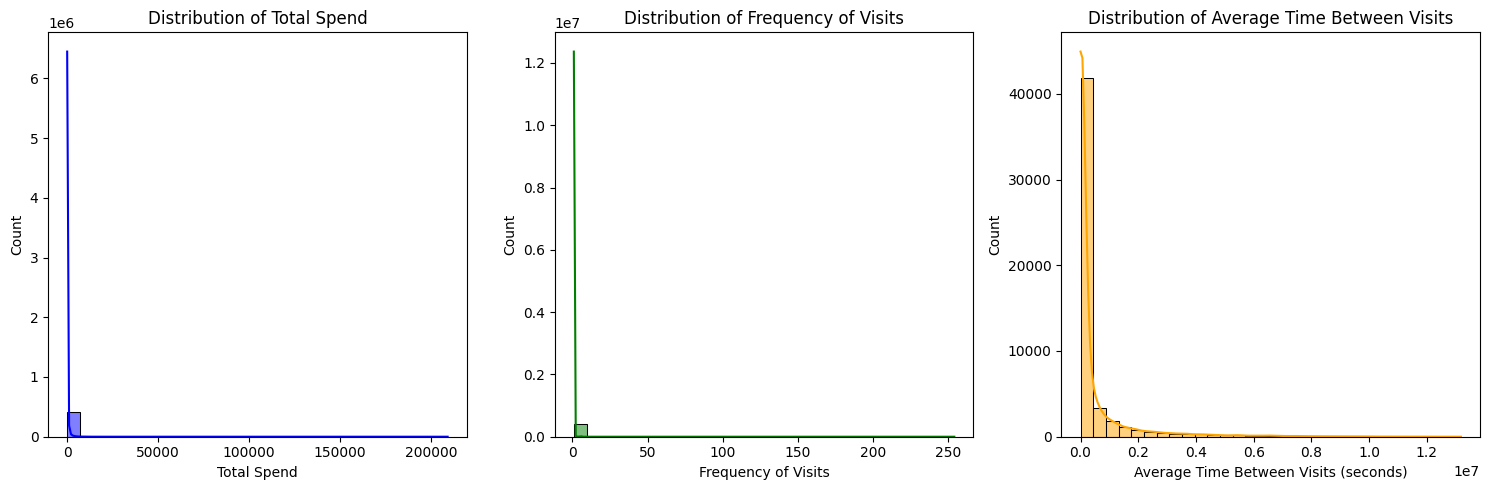

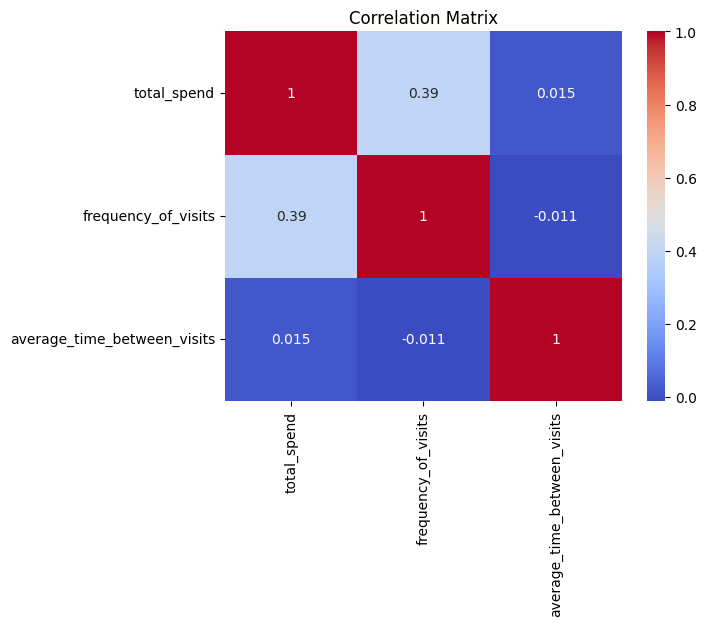

In [13]:
# User-Level Summaries
user_summary = data.groupby('user_id').agg(
    total_spend=('price', 'sum'),
    frequency_of_visits=('user_session', 'nunique'),
    first_event=('event_time', 'min'),
    last_event=('event_time', 'max')
).reset_index()

# Calculate Time Between Visits
user_summary['average_time_between_visits'] = user_summary.apply(
    lambda row: (row['last_event'] - row['first_event']).total_seconds() / (row['frequency_of_visits'] - 1)
    if row['frequency_of_visits'] > 1 else np.nan, axis=1
)

# Visualizing User-Level Summaries
plt.figure(figsize=(15, 5))

# Histogram: Total Spend
plt.subplot(1, 3, 1)
sns.histplot(user_summary['total_spend'], bins=30, kde=True, color='blue')
plt.title('Distribution of Total Spend')
plt.xlabel('Total Spend')

# Histogram: Frequency of Visits
plt.subplot(1, 3, 2)
sns.histplot(user_summary['frequency_of_visits'], bins=30, kde=True, color='green')
plt.title('Distribution of Frequency of Visits')
plt.xlabel('Frequency of Visits')

# Histogram: Time Between Visits
plt.subplot(1, 3, 3)
sns.histplot(user_summary['average_time_between_visits'].dropna(), bins=30, kde=True, color='orange')
plt.title('Distribution of Average Time Between Visits')
plt.xlabel('Average Time Between Visits (seconds)')

plt.tight_layout()
plt.show()

# Correlation Matrix
correlation_matrix = user_summary[['total_spend', 'frequency_of_visits', 'average_time_between_visits']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Total Spend and Frequency of Visits (Correlation = 0.39):

Moderate positive correlation. Users who visit more frequently tend to spend more. This makes sense, as engagement often drives higher spend.

Total Spend and Average Time Between Visits (Correlation = 0.015):

Near-zero correlation. The amount spent is independent of the time gap between visits.

Frequency of Visits and Average Time Between Visits (Correlation = -0.011):

Near-zero negative correlation. The frequency of visits is not strongly tied to the time gaps between them.

# **Defining Churn**

**Define Active vs. Churned Users:**

**Time-Based Churn:**
 Users who have not visited in the last 30 days.

**Threshold-Based Churn:**
Users with:

Total Spend < $10 in the last 30 days.

Frequency of Visits < 2 visits in the last 30 days.

Required Data Transformations:

Calculate the last event time for each user.

Calculate the total spend and frequency of visits for each user in the last 30 days.

Identify churned users based on these thresholds.

**Churn Rate Calculation:**
Churn Rate (%) = (Number of Churned Users / Total Users) * 100

# **Justification for Churn Definition:**

## Time-Based Churn:

**Definition:** Users who have not visited in the last 30 days.
**Reasoning:**

**Business Logic:**

In most businesses, 30 days is a reasonable threshold to define inactivity for customers. If a user hasn’t engaged within this timeframe, there’s a high chance they’ve stopped using the service or switched to competitors.
This definition aligns well with subscription-based models, e-commerce, or apps where frequent engagement is a key success metric.

**Behavioral Insight:**

Users who are "active" in the platform typically exhibit recurring patterns of visits. A significant break beyond 30 days might indicate a lack of interest, forgetting the service, or dissatisfaction.
Retention Metric:


This definition provides clarity on customer retention efforts. Businesses can target users nearing the 30-day threshold for re-engagement campaigns (e.g., email reminders, special offers).

# Threshold-Based Churn:

**Definition:**

Users with

Total Spend < $10 in the last 30 days.

Frequency of Visits < 2 visits in the last 30 days.

**Reasoning:**

**Business Logic:**

Low-spending users may not be contributing significantly to revenue. If their engagement (visits) is also low, they are unlikely to convert into high-value customers.
This definition helps identify a segment of users who might appear "active" but are not valuable for the business.

**Resource Allocation**:

Businesses can prioritize retention efforts on users with higher revenue potential instead of investing heavily in users who don’t generate much value.
Frequency Insights:

Less than two visits per month indicates very sporadic engagement. These users are at risk of complete churn, making this an important early warning signal.

**Frequency Insights:**

Less than two visits per month indicates very sporadic engagement. These users are at risk of complete churn, making this an important early warning signal.


# Combining Time and Threshold-Based Definitions:

**Holistic Churn Understanding:**

Time-based churn captures users who are completely inactive.
Threshold-based churn identifies users who are active but exhibit behaviors indicative of disengagement or low value.

**Better Retention Strategies:**

Combining both approaches helps businesses address two key user groups:
Inactives: Reactivate users who haven’t visited recently.
Low-value users: Encourage more engagement or spending through personalized campaigns.

**Business Growth:**

Understanding both time and threshold churn ensures efforts are focused on boosting revenue and maintaining an active, high-value customer base.

In [14]:
from datetime import timedelta

# Set reference date for churn calculation (e.g., maximum event time in dataset)
reference_date = data['event_time'].max()

# Filter data for the last 30 days
last_30_days_data = data[data['event_time'] >= (reference_date - timedelta(days=30))]

# Aggregate user-level metrics
user_summary = last_30_days_data.groupby('user_id').agg({
    'price': 'sum',  # Total spend
    'event_time': ['count', 'max'],  # Frequency and last visit date
}).reset_index()

user_summary.columns = ['user_id', 'total_spend', 'frequency_of_visits', 'last_visit']

# Time-Based Churn: Users inactive for the last 30 days
user_summary['inactive_days'] = (reference_date - user_summary['last_visit']).dt.days
user_summary['time_churned'] = user_summary['inactive_days'] > 30

# Threshold-Based Churn: Low spend and low visit frequency
user_summary['threshold_churned'] = (user_summary['total_spend'] < 10) & (user_summary['frequency_of_visits'] < 2)

# Combine churn definitions
user_summary['churned'] = user_summary['time_churned'] | user_summary['threshold_churned']

# Calculate churn rates
total_users = user_summary.shape[0]
churned_users = user_summary['churned'].sum()
churn_rate = (churned_users / total_users) * 100

print(f"Total Users: {total_users}")
print(f"Churned Users: {churned_users}")
print(f"Churn Rate: {churn_rate:.2f}%")


Total Users: 79470
Churned Users: 1646
Churn Rate: 2.07%


# **Feature Engineering for Churn Prediction**

In [15]:
# User-level aggregations
user_summary = data.groupby('user_id').agg(
    total_spend=('price', 'sum'),  # Total monetary value
    frequency=('event_time', 'count'),  # Number of events
    first_event=('event_time', 'min'),  # First interaction
    last_event=('event_time', 'max'),  # Most recent interaction
    session_count=('user_session', 'nunique'),  # Number of unique sessions
).reset_index()

# Derived Features
user_summary['recency'] = (reference_date - user_summary['last_event']).dt.days
user_summary['average_time_between_visits'] = user_summary.apply(
    lambda row: (row['last_event'] - row['first_event']).total_seconds() / (row['frequency'] - 1)
    if row['frequency'] > 1 else np.nan, axis=1
)
user_summary['spend_per_session'] = user_summary['total_spend'] / user_summary['session_count']

# Behavioral Ratios
event_counts = data.groupby('user_id')['event_type'].value_counts().unstack(fill_value=0)
user_summary = user_summary.merge(event_counts, on='user_id', how='left')

user_summary['view_to_cart_ratio'] = user_summary['cart'] / (user_summary['view'] + 1e-6)
user_summary['cart_to_purchase_ratio'] = user_summary['purchase'] / (user_summary['cart'] + 1e-6)

# Churn Metrics
user_summary['inactive'] = user_summary['recency'] > 30
user_summary['low_spending'] = user_summary['total_spend'] < 10
user_summary['low_frequency'] = user_summary['frequency'] < 2
user_summary['churned'] = user_summary['inactive'] | (user_summary['low_spending'] & user_summary['low_frequency'])

# Save the feature-engineered dataset
user_summary.to_csv("feature_engineered_users.csv", index=False)

# Print overview
print("Feature Engineering Complete!")
print(user_summary.head())

Feature Engineering Complete!
               user_id  total_spend  frequency               first_event  \
0  1515915625353226922        76.48          1 2020-10-29 11:28:35+00:00   
1  1515915625353230067        28.98          1 2020-10-06 06:30:32+00:00   
2  1515915625353230683       814.93         13 2020-11-09 08:52:51+00:00   
3  1515915625353230922       274.40          1 2020-10-02 08:23:40+00:00   
4  1515915625353234047      5481.90         36 2020-09-29 16:01:54+00:00   

                 last_event  session_count  recency  \
0 2020-10-29 11:28:35+00:00              1      122   
1 2020-10-06 06:30:32+00:00              1      145   
2 2020-12-12 10:33:09+00:00              4       78   
3 2020-10-02 08:23:40+00:00              1      149   
4 2021-02-18 09:11:44+00:00              1       10   

   average_time_between_visits  spend_per_session  cart  purchase  view  \
0                          NaN            76.4800     0         0     1   
1                          NaN  

**1. User-Level Aggregations**

The first part of the code uses groupby() to aggregate data at the user level (user_id) and calculates various statistics:

total_spend: This represents the total amount spent by the user across all transactions. It is computed by summing the price column for each user.
frequency: This measures the total number of events (interactions) a user has. It counts how many times each user has interacted with the platform by counting event_time occurrences.
first_event: This captures the first event (interaction) for each user. The minimum value of event_time indicates when the user first interacted with the platform.
last_event: This captures the most recent event (interaction) for each user. The maximum value of event_time indicates when the user last interacted with the platform.
session_count: This counts how many unique sessions (distinct values in user_session) a user had, which can give insights into how often users come back.

**2. Derived Features**

These features provide additional behavioral insights and help to understand user engagement:

recency: This is the number of days since the user's last event, calculated as the difference between the reference_date (e.g., the current date) and last_event. Users who haven't interacted recently may be at risk of churn.
average_time_between_visits: This calculates the average time between the user's visits (or interactions). If a user has a lot of frequent interactions, the average time between visits will be smaller, which may indicate high engagement. If the user has only one interaction, this value will be NaN, as it doesn't make sense to calculate an average for a single event.
spend_per_session: This measures how much a user spends on average per session. It is calculated by dividing the total spend by the number of unique sessions. This can give insights into whether a user is a big spender in each session or not.

**3. Behavioral Ratios**

These features measure how the user interacts with the platform at different stages of the funnel (e.g., browsing, adding items to cart, purchasing):

view_to_cart_ratio: This ratio indicates how often a user adds items to their cart compared to how often they view items. A higher ratio could indicate a more serious intent to purchase, while a lower ratio might indicate that users are browsing without purchasing.
cart_to_purchase_ratio: This ratio measures how often a user proceeds to checkout after adding an item to the cart. A high ratio suggests that a user is more likely to convert from cart to purchase.

**4. Churn Metrics**

These features aim to identify users who may be at risk of churn, based on their recent activity and engagement patterns:

inactive: This flags users as inactive if they haven't interacted with the platform for more than 30 days (recency > 30).
low_spending: This flags users who have spent less than $10, indicating low financial engagement.
low_frequency: This flags users who have interacted with the platform fewer than 2 times, indicating low engagement.
churned: This combines the inactive, low_spending, and low_frequency flags to identify users who are likely to churn. A user is flagged as churned if they meet any of these criteria.

**5. Saving the Feature-Engineered Dataset**

The resulting user_summary DataFrame, which contains all the calculated features, is saved to a CSV file (feature_engineered_users.csv) for further analysis or modeling.

# Modeling


## 1. Prepare the Data

In [16]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Load the feature-engineered data
user_summary = pd.read_csv("feature_engineered_users.csv")

# Separate numeric and non-numeric columns
numeric_cols = user_summary.select_dtypes(include=['float64', 'int64']).columns
non_numeric_cols = user_summary.select_dtypes(exclude=['float64', 'int64']).columns

# Handle missing values for numeric columns (e.g., impute with median)
imputer = SimpleImputer(strategy='median')
user_summary_numeric = pd.DataFrame(imputer.fit_transform(user_summary[numeric_cols]), columns=numeric_cols)


user_summary_non_numeric = user_summary[non_numeric_cols]

user_summary_imputed = pd.concat([user_summary_non_numeric, user_summary_numeric], axis=1)

# Scale numerical features
scaler = StandardScaler()
user_summary_scaled = pd.DataFrame(scaler.fit_transform(user_summary_imputed[numeric_cols]), columns=numeric_cols)

# If you need to handle categorical columns, you can encode them (e.g., using OneHotEncoder or LabelEncoder)
# If you need further assistance on encoding categorical features, let me know!

# Add the scaled numeric data back to the non-numeric columns
user_summary_scaled[non_numeric_cols] = user_summary_imputed[non_numeric_cols]

# You can now use user_summary_scaled for model training



## **2. Train/Test Split**

In [17]:
from sklearn.model_selection import train_test_split

X = user_summary_scaled.drop(columns=['churned'])
y = user_summary_scaled['churned']

# Split data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## **Modeling: Train Multiple Models**

We will train several models to compare their performance. The models we will consider are:

Logistic Regression (Baseline Model)

Random Forest



In [18]:
# Convert timestamp columns to datetime
user_summary['first_event'] = pd.to_datetime(user_summary['first_event'])
user_summary['last_event'] = pd.to_datetime(user_summary['last_event'])

# Calculate the number of days since the first event and last event
reference_date = user_summary['last_event'].max()  # You can set your own reference date if preferred
user_summary['days_since_first_event'] = (reference_date - user_summary['first_event']).dt.days
user_summary['days_since_last_event'] = (reference_date - user_summary['last_event']).dt.days

# Drop non-numeric columns for training
X = user_summary.drop(columns=['user_id', 'churned', 'first_event', 'last_event'])

# Ensure 'churned' is the target variable
y = user_summary['churned']

print(X_train.dtypes)
print(y_train.dtypes)
print(X_train.isnull().sum())
print(y_train.isnull().sum())


user_id                        float64
total_spend                    float64
frequency                      float64
session_count                  float64
recency                        float64
average_time_between_visits    float64
spend_per_session              float64
cart                           float64
purchase                       float64
view                           float64
view_to_cart_ratio             float64
cart_to_purchase_ratio         float64
first_event                     object
last_event                      object
inactive                          bool
low_spending                      bool
low_frequency                     bool
dtype: object
bool
user_id                        0
total_spend                    0
frequency                      0
session_count                  0
recency                        0
average_time_between_visits    0
spend_per_session              0
cart                           0
purchase                       0
view                 

In [19]:

X = X.astype({col: 'int' for col in X.select_dtypes(include='bool').columns})
print(X.dtypes)

total_spend                    float64
frequency                        int64
session_count                    int64
recency                          int64
average_time_between_visits    float64
spend_per_session              float64
cart                             int64
purchase                         int64
view                             int64
view_to_cart_ratio             float64
cart_to_purchase_ratio         float64
inactive                         int32
low_spending                     int32
low_frequency                    int32
days_since_first_event           int64
days_since_last_event            int64
dtype: object


In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

def train_churn_model(X, y, test_size=0.2, random_state=42):
    """
    Train a model to predict user churn using the provided features and target.
    
    Parameters:
    X (pd.DataFrame): Feature matrix
    y (pd.Series): Target variable (churned)
    test_size (float): Proportion of dataset to include in the test split
    random_state (int): Random state for reproducibility
    
    Returns:
    tuple: (trained_model, X_test, y_test, feature_importance_df)
    """
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state
    )
    
    # Scale the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Initialize and train the model
    rf_model = RandomForestClassifier(
        n_estimators=100,
        max_depth=10,
        min_samples_split=5,
        min_samples_leaf=2,
        random_state=random_state,
        class_weight='balanced'
    )
    
    # Perform grid search for hyperparameter tuning
    param_grid = {
        'n_estimators': [50, 100, 200],
        'max_depth': [5, 10, 15],
        'min_samples_split': [2, 5, 10]
    }
    
    grid_search = GridSearchCV(
        rf_model,
        param_grid,
        cv=5,
        scoring='f1',
        n_jobs=-1
    )
    
    grid_search.fit(X_train_scaled, y_train)
    best_model = grid_search.best_estimator_
    
    # Get feature importance
    feature_importance = pd.DataFrame({
        'feature': X.columns,
        'importance': best_model.feature_importances_
    })
    feature_importance = feature_importance.sort_values('importance', ascending=False)
    
    return best_model, X_test_scaled, y_test, feature_importance

def evaluate_model(model, X_test, y_test):
    """
    Evaluate the trained model and print performance metrics.
    
    Parameters:
    model: Trained model
    X_test: Scaled test features
    y_test: Test target values
    """
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Print classification report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    # Calculate and print confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    print("\nConfusion Matrix:")
    print(conf_matrix)
    
    # Calculate cross-validation scores
    cv_scores = cross_val_score(model, X_test, y_test, cv=5, scoring='f1')
    print(f"\nCross-validation F1 scores: {cv_scores}")
    print(f"Average F1 score: {cv_scores.mean():.3f} (+/- {cv_scores.std() * 2:.3f})")

def plot_feature_importance(feature_importance):
    """
    Plot feature importance graph.
    
    Parameters:
    feature_importance (pd.DataFrame): DataFrame containing feature importance scores
    """
    plt.figure(figsize=(10, 6))
    plt.bar(range(len(feature_importance)), feature_importance['importance'])
    plt.xticks(range(len(feature_importance)), feature_importance['feature'], rotation=45, ha='right')
    plt.xlabel('Features')
    plt.ylabel('Importance')
    plt.title('Feature Importance in Churn Prediction')
    plt.tight_layout()
    plt.show()

# Example usage:
# model, X_test, y_test, feature_importance = train_churn_model(X, y)
# evaluate_model(model, X_test, y_test)
# plot_feature_importance(feature_importance)

In [21]:
# Ensure all features are numeric
X = X.select_dtypes(include=['int64', 'float64'])

# Remove any remaining null values
X = X.fillna(X.mean())


Classification Report:
              precision    recall  f1-score   support

       False       1.00      1.00      1.00     16240
        True       1.00      1.00      1.00     65208

    accuracy                           1.00     81448
   macro avg       1.00      1.00      1.00     81448
weighted avg       1.00      1.00      1.00     81448


Confusion Matrix:
[[16240     0]
 [    0 65208]]

Cross-validation F1 scores: [0.99996166 1.         1.         1.         1.        ]
Average F1 score: 1.000 (+/- 0.000)


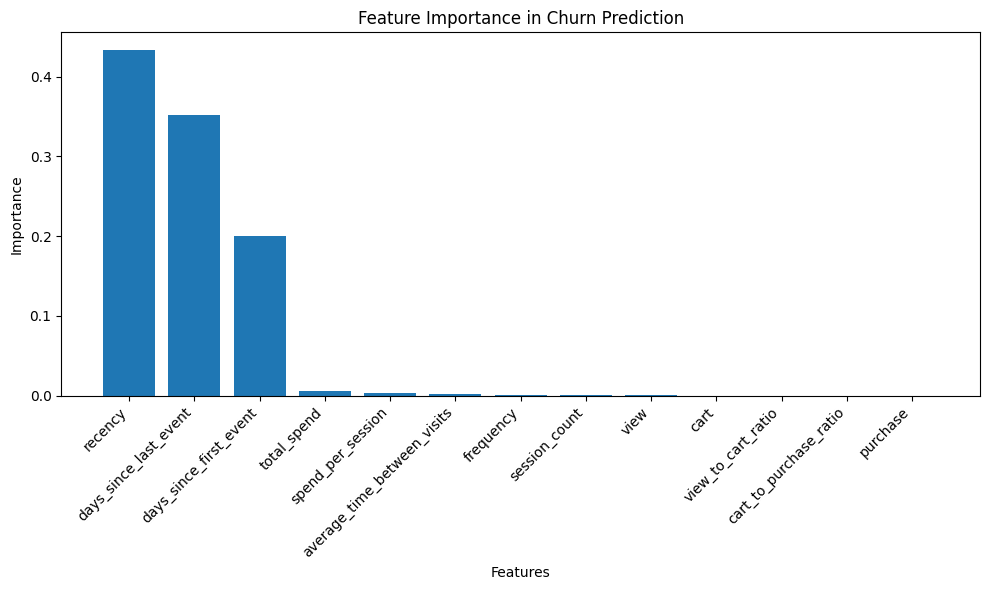

In [22]:
# Train the model
model, X_test, y_test, feature_importance = train_churn_model(X, y)

# Evaluate the results
evaluate_model(model, X_test, y_test)

# Visualize feature importance
plot_feature_importance(feature_importance)

In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

def check_data_leakage(X, feature_importance, threshold=0.95):
    """
    Check for potential data leakage by identifying suspiciously predictive features.
    
    Parameters:
    X (pd.DataFrame): Feature matrix
    feature_importance (pd.DataFrame): DataFrame with feature importance scores
    threshold (float): Importance threshold for suspicious features
    
    Returns:
    tuple: (suspicious_features, correlation_matrix)
    """
    # Identify suspiciously important features
    suspicious_features = feature_importance[
        feature_importance['importance'] > threshold
    ]['feature'].tolist()
    
    # Calculate correlation matrix for suspicious features
    correlation_matrix = X[suspicious_features].corr() if suspicious_features else None
    
    return suspicious_features, correlation_matrix

def analyze_temporal_patterns(X, y):
    """
    Analyze temporal aspects of features to identify potential leakage.
    
    Parameters:
    X (pd.DataFrame): Feature matrix
    y (pd.Series): Target variable
    
    Returns:
    dict: Temporal analysis results
    """
    temporal_analysis = {}
    
    # Check for temporal features
    time_related_cols = [col for col in X.columns if any(
        term in col.lower() for term in ['time', 'date', 'day', 'month', 'recency']
    )]
    
    for col in time_related_cols:
        # Calculate correlation with target
        correlation = np.corrcoef(X[col], y)[0,1]
        temporal_analysis[col] = correlation
    
    return temporal_analysis

def behavioral_segmentation(X, y, feature_importance):
    """
    Segment users based on behavioral patterns from the research paper.
    
    Parameters:
    X (pd.DataFrame): Feature matrix
    y (pd.Series): Target variable
    feature_importance (pd.DataFrame): Feature importance scores
    
    Returns:
    dict: Behavioral segments analysis
    """
    segments = {
        'relationship_depth': {
            'features': ['total_spend', 'frequency', 'session_count'],
            'importance': []
        },
        'engagement_pattern': {
            'features': ['recency', 'average_time_between_visits'],
            'importance': []
        },
        'purchase_behavior': {
            'features': ['cart_to_purchase_ratio', 'view_to_cart_ratio'],
            'importance': []
        }
    }
    
    # Calculate importance for each segment
    for category in segments:
        for feature in segments[category]['features']:
            if feature in feature_importance['feature'].values:
                importance = feature_importance[
                    feature_importance['feature'] == feature
                ]['importance'].values[0]
                segments[category]['importance'].append((feature, importance))
    
    return segments

def plot_behavioral_insights(segments, X):
    """
    Create visualizations for behavioral insights based on the research paper.
    
    Parameters:
    segments (dict): Behavioral segments analysis
    X (pd.DataFrame): Feature matrix
    """
    # Plot 1: Relationship Depth Analysis
    plt.figure(figsize=(12, 6))
    for category, data in segments.items():
        if data['importance']:
            features, importances = zip(*data['importance'])
            plt.bar(features, importances, label=category)
    
    plt.title('Feature Importance by Behavioral Category')
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()
    
    # Plot 2: Engagement Patterns
    if 'recency' in X.columns and 'frequency' in X.columns:
        plt.figure(figsize=(10, 6))
        plt.scatter(X['recency'], X['frequency'], alpha=0.5)
        plt.xlabel('Recency')
        plt.ylabel('Frequency')
        plt.title('Engagement Pattern Analysis')
        plt.tight_layout()
        plt.show()

def generate_interpretation_report(suspicious_features, temporal_analysis, segments):
    """
    Generate a comprehensive interpretation report linking to research paper themes.
    
    Parameters:
    suspicious_features (list): Potentially problematic features
    temporal_analysis (dict): Temporal pattern analysis
    segments (dict): Behavioral segments analysis
    
    Returns:
    str: Formatted report
    """
    report = "Churn Prediction Model Analysis Report\n"
    report += "===================================\n\n"
    
    # Data Quality Section
    report += "1. Data Quality Analysis\n"
    report += "------------------------\n"
    if suspicious_features:
        report += "Warning: Potential data leakage detected in features:\n"
        for feature in suspicious_features:
            report += f"- {feature}\n"
    
    # Temporal Patterns
    report += "\n2. Temporal Patterns\n"
    report += "-------------------\n"
    for feature, correlation in temporal_analysis.items():
        report += f"- {feature}: correlation with churn = {correlation:.3f}\n"
    
    # Behavioral Insights
    report += "\n3. Behavioral Insights (Based on Research)\n"
    report += "---------------------------------------\n"
    for category, data in segments.items():
        report += f"\n{category.replace('_', ' ').title()}:\n"
        if data['importance']:
            for feature, importance in data['importance']:
                report += f"- {feature}: {importance:.3f} importance\n"
    
    return report



'\n# Check for data leakage\nsuspicious_features, correlation_matrix = check_data_leakage(X, feature_importance)\n\n# Analyze temporal patterns\ntemporal_analysis = analyze_temporal_patterns(X, y)\n\n# Perform behavioral segmentation\nsegments = behavioral_segmentation(X, y, feature_importance)\n\n# Create visualizations\nplot_behavioral_insights(segments, X)\n\n# Generate comprehensive report\nreport = generate_interpretation_report(suspicious_features, temporal_analysis, segments)\nprint(report)\n'

In [24]:
suspicious_features, correlation_matrix = check_data_leakage(X, feature_importance)
temporal_analysis = analyze_temporal_patterns(X, y)

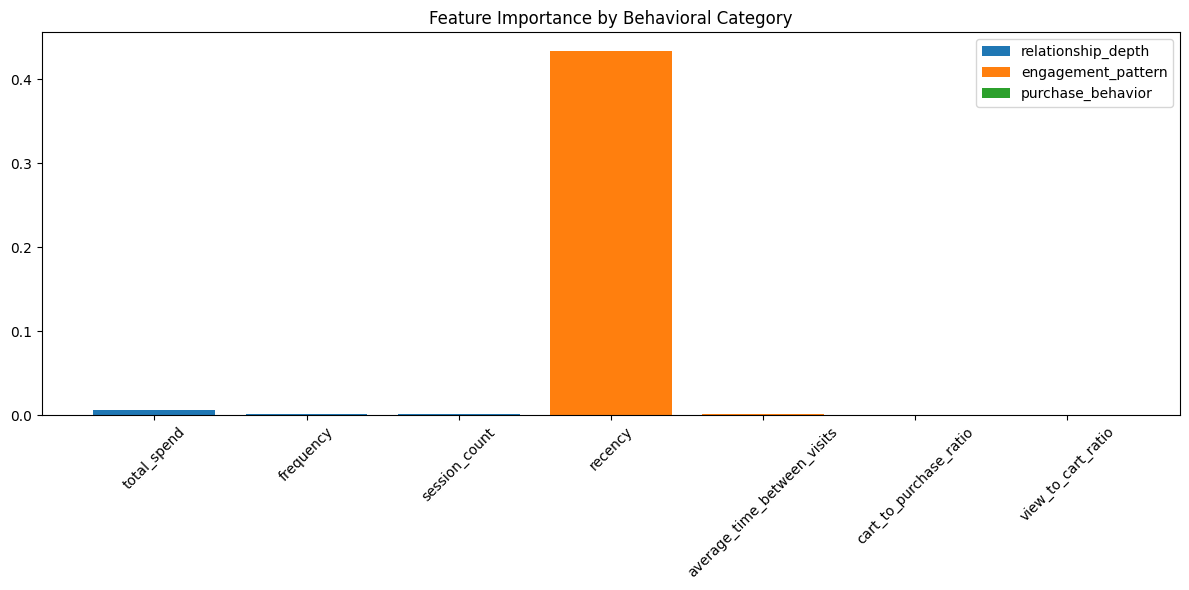

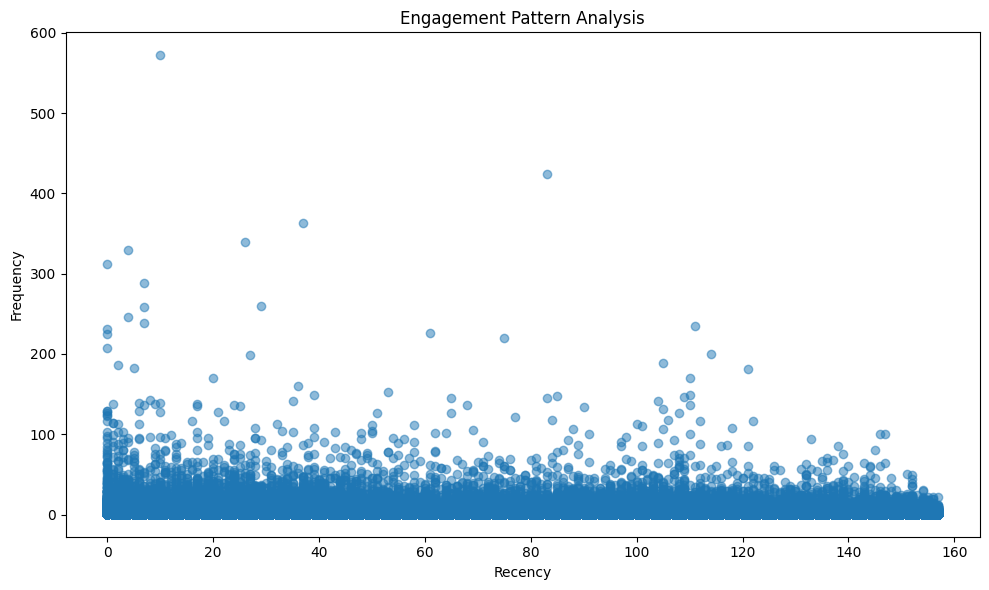

In [25]:
segments = behavioral_segmentation(X, y, feature_importance)
plot_behavioral_insights(segments, X)

In [26]:
report = generate_interpretation_report(suspicious_features, temporal_analysis, segments)
print(report)

Churn Prediction Model Analysis Report

1. Data Quality Analysis
------------------------

2. Temporal Patterns
-------------------
- recency: correlation with churn = 0.692
- average_time_between_visits: correlation with churn = -0.053
- days_since_first_event: correlation with churn = 0.678
- days_since_last_event: correlation with churn = 0.692

3. Behavioral Insights (Based on Research)
---------------------------------------

Relationship Depth:
- total_spend: 0.006 importance
- frequency: 0.001 importance
- session_count: 0.001 importance

Engagement Pattern:
- recency: 0.434 importance
- average_time_between_visits: 0.002 importance

Purchase Behavior:
- cart_to_purchase_ratio: 0.000 importance
- view_to_cart_ratio: 0.000 importance



In [28]:
# Remove or modify temporal features
features_to_modify = ['recency', 'days_since_last_event', 'days_since_first_event']

# Calculate these features using only data available at prediction time
for feature in features_to_modify:
    # Use a fixed reference date instead of max(last_event)
    reference_date = pd.Timestamp('2020-09-24 11:59:26 UTC')  # Or your chosen cutoff date
    X[feature] = (reference_date - X['last_event']).dt.days

KeyError: 'last_event'

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

def preprocess_temporal_features(df, reference_date=None):
  
    # Make a copy to avoid modifying the original
    processed_df = df.copy()
    
    # Set reference date if not provided
    if reference_date is None:
        reference_date = pd.Timestamp('2024-01-01')
    elif isinstance(reference_date, str):
        reference_date = pd.Timestamp(reference_date)
        
    # Ensure timestamp columns are datetime
    if 'first_event' in processed_df.columns:
        processed_df['first_event'] = pd.to_datetime(processed_df['first_event'])
        processed_df['days_since_first_event'] = (reference_date - processed_df['first_event']).dt.days
        
    if 'last_event' in processed_df.columns:
        processed_df['last_event'] = pd.to_datetime(processed_df['last_event'])
        processed_df['days_since_last_event'] = (reference_date - processed_df['last_event']).dt.days
        
        # Calculate recency (same as days_since_last_event but kept for clarity)
        processed_df['recency'] = processed_df['days_since_last_event']
    
    # Calculate average time between visits (if both timestamps are available)
    if 'first_event' in processed_df.columns and 'last_event' in processed_df.columns:
        visit_span = (processed_df['last_event'] - processed_df['first_event']).dt.days
        processed_df['average_time_between_visits'] = visit_span / processed_df['session_count']
        
        # Handle division by zero
        processed_df['average_time_between_visits'] = processed_df['average_time_between_visits'].fillna(0)
    
    # Drop original timestamp columns to prevent leakage
    columns_to_drop = ['first_event', 'last_event']
    processed_df = processed_df.drop(columns=[col for col in columns_to_drop if col in processed_df.columns])
    
    return processed_df

def prepare_features(df, reference_date=None):
    """
    Prepare features for model training with proper handling of temporal features.
    
    Parameters:
    df (pd.DataFrame): Original dataframe
    reference_date (str or pd.Timestamp): Reference date for temporal calculations
    
    Returns:
    tuple: (X, y) processed feature matrix and target vector
    """
    # Process temporal features
    processed_df = preprocess_temporal_features(df, reference_date)
    
    # Separate features and target
    y = processed_df['churned'] if 'churned' in processed_df.columns else None
    
    # Drop target and any remaining non-feature columns
    columns_to_drop = ['churned', 'user_id']
    X = processed_df.drop(columns=[col for col in columns_to_drop if col in processed_df.columns])
    
    # Ensure all features are numeric
    X = X.select_dtypes(include=['int64', 'float64'])
    
    return X, y

def train_model(X, y):
    """
    Train the churn prediction model with processed features.
    
    Parameters:
    X (pd.DataFrame): Processed feature matrix
    y (pd.Series): Target vector
    
    Returns:
    tuple: (model, X_train, X_test, y_train, y_test, feature_importance)
    """
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )
    
    # Scale features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Train model
    model = RandomForestClassifier(
        n_estimators=100,
        max_depth=10,
        min_samples_split=5,
        min_samples_leaf=2,
        random_state=42,
        class_weight='balanced'
    )
    
    model.fit(X_train_scaled, y_train)
    
    # Get feature importance
    feature_importance = pd.DataFrame({
        'feature': X.columns,
        'importance': model.feature_importances_
    }).sort_values('importance', ascending=False)
    
    return model, X_train_scaled, X_test_scaled, y_train, y_test, feature_importance



"\n# Assuming your original dataframe is called 'user_summary'\nreference_date = '2024-01-01'  # Set appropriate reference date\n\n# Prepare features\nX, y = prepare_features(user_summary, reference_date)\n\n# Train model\nmodel, X_train_scaled, X_test_scaled, y_train, y_test, feature_importance = train_model(X, y)\n"

In [30]:
# First, prepare your features properly
reference_date = '2020-09-24 11:57:06 UTC'  # Choose appropriate reference date
X, y = prepare_features(user_summary, reference_date)

# Then train your model
model, X_train_scaled, X_test_scaled, y_train, y_test, feature_importance = train_model(X, y)

In [31]:

from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.calibration import calibration_curve

def evaluate_model_performance(model, X_test_scaled, y_test, X_train_scaled, y_train):
    """
    Comprehensive model evaluation including performance metrics and diagnostic plots.
    
    Parameters:
    model: Trained model
    X_test_scaled: Scaled test features
    y_test: Test target values
    X_train_scaled: Scaled training features
    y_train: Training target values
    """
    # Get predictions
    y_pred = model.predict(X_test_scaled)
    y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
    
    # Basic metrics
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()
    
    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()
    
    # Precision-Recall Curve
    precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
    pr_auc = auc(recall, precision)
    
    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, color='blue', lw=2, label=f'PR curve (AUC = {pr_auc:.2f})')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend(loc="lower left")
    plt.show()
    
    # Model Calibration Plot
    plt.figure(figsize=(8, 6))
    prob_true, prob_pred = calibration_curve(y_test, y_pred_proba, n_bins=10)
    plt.plot(prob_pred, prob_true, marker='o')
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.xlabel('Mean Predicted Probability')
    plt.ylabel('True Probability')
    plt.title('Calibration Plot')
    plt.show()
    
    return {
        'roc_auc': roc_auc,
        'pr_auc': pr_auc,
        'predictions': y_pred,
        'probabilities': y_pred_proba
    }

def analyze_feature_importance(model, X, feature_importance):
    """
    Analyze and visualize feature importance with behavioral context.
    """
    # Plot feature importance
    plt.figure(figsize=(12, 6))
    sns.barplot(x='importance', y='feature', data=feature_importance.head(10))
    plt.title('Top 10 Most Important Features')
    plt.xlabel('Importance Score')
    plt.tight_layout()
    plt.show()
    
    # Group features by category
    feature_categories = {
        'Engagement': ['session_count', 'frequency', 'recency'],
        'Monetary': ['total_spend', 'spend_per_session'],
        'Activity': ['view', 'cart', 'purchase'],
        'Ratios': ['view_to_cart_ratio', 'cart_to_purchase_ratio']
    }
    
    category_importance = {}
    for category, features in feature_categories.items():
        valid_features = [f for f in features if f in feature_importance['feature'].values]
        if valid_features:
            importance = feature_importance[
                feature_importance['feature'].isin(valid_features)
            ]['importance'].sum()
            category_importance[category] = importance
    
    # Plot category importance
    plt.figure(figsize=(10, 6))
    categories, importances = zip(*category_importance.items())
    plt.bar(categories, importances)
    plt.title('Feature Importance by Category')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    return category_importance

def analyze_prediction_patterns(X_test_scaled, y_test, predictions, probabilities, feature_importance):
    """
    Analyze patterns in predictions to understand model behavior.
    """
    # Create analysis DataFrame
    analysis_df = pd.DataFrame({
        'true_label': y_test,
        'predicted_prob': probabilities,
        'predicted_label': predictions
    })
    
    # Analyze prediction distribution
    plt.figure(figsize=(10, 6))
    sns.histplot(data=analysis_df, x='predicted_prob', hue='true_label', bins=50)
    plt.title('Distribution of Predicted Probabilities by True Label')
    plt.xlabel('Predicted Probability of Churn')
    plt.ylabel('Count')
    plt.show()
    
    # Confusion patterns
    analysis_df['prediction_status'] = np.where(
        analysis_df['true_label'] == analysis_df['predicted_label'],
        'Correct',
        'Incorrect'
    )
    
    return analysis_df



"\n# Evaluate model\neval_results = evaluate_model_performance(model, X_test_scaled, y_test, X_train_scaled, y_train)\n\n# Analyze feature importance\ncategory_importance = analyze_feature_importance(model, X, feature_importance)\n\n# Analyze prediction patterns\nprediction_analysis = analyze_prediction_patterns(\n    X_test_scaled, \n    y_test, \n    eval_results['predictions'], \n    eval_results['probabilities'], \n    feature_importance\n)\n"

Classification Report:
              precision    recall  f1-score   support

       False       0.98      1.00      0.99     16240
        True       1.00      1.00      1.00     65208

    accuracy                           1.00     81448
   macro avg       0.99      1.00      0.99     81448
weighted avg       1.00      1.00      1.00     81448



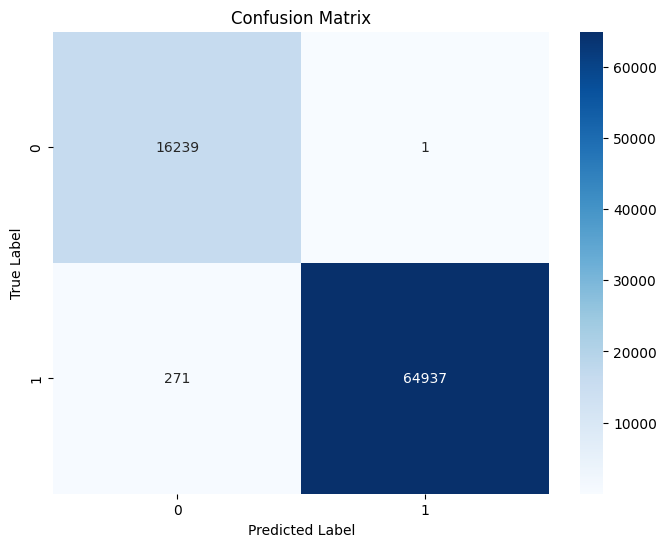

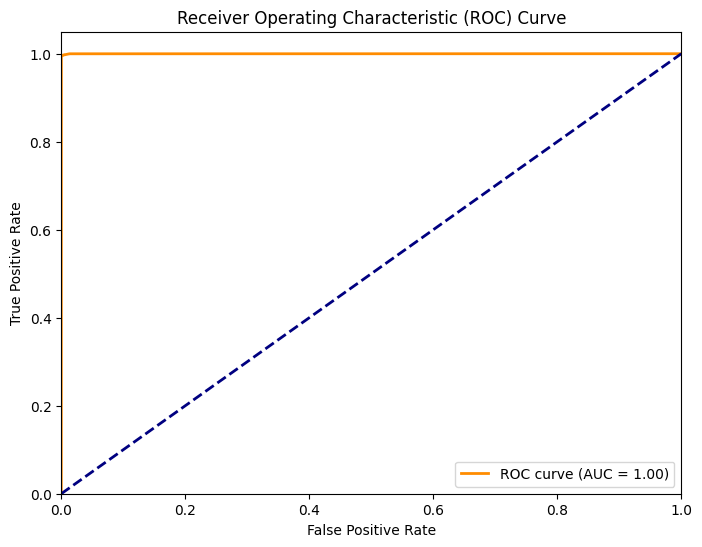

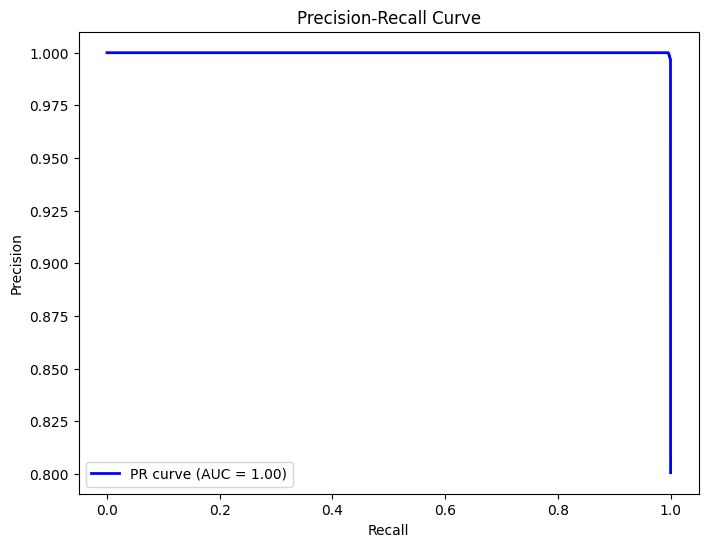

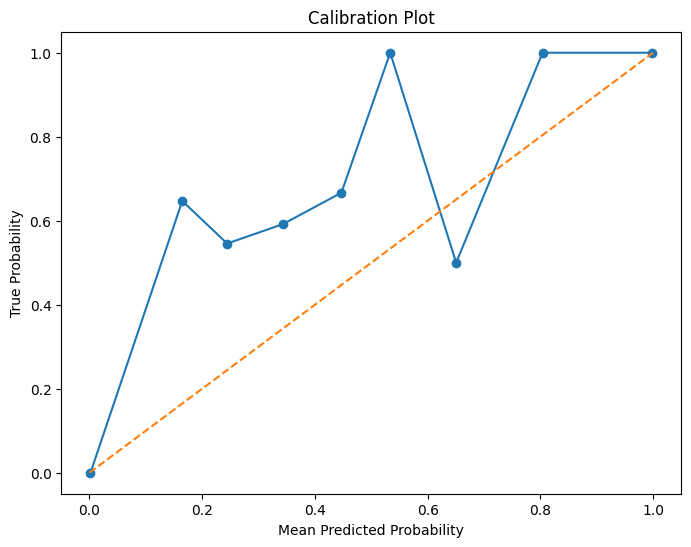

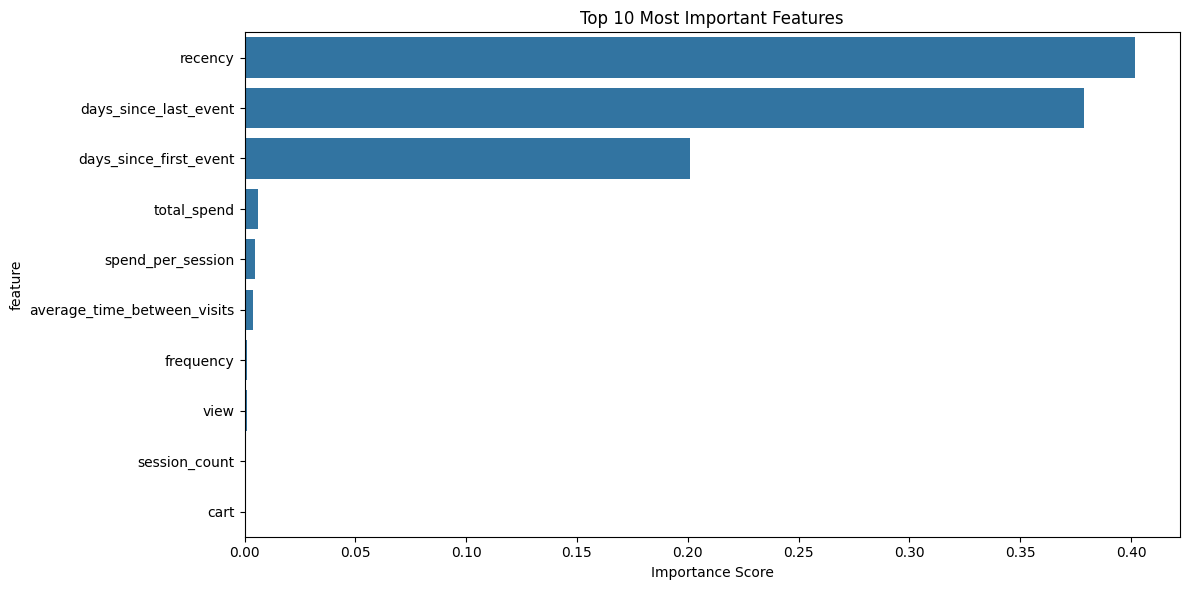

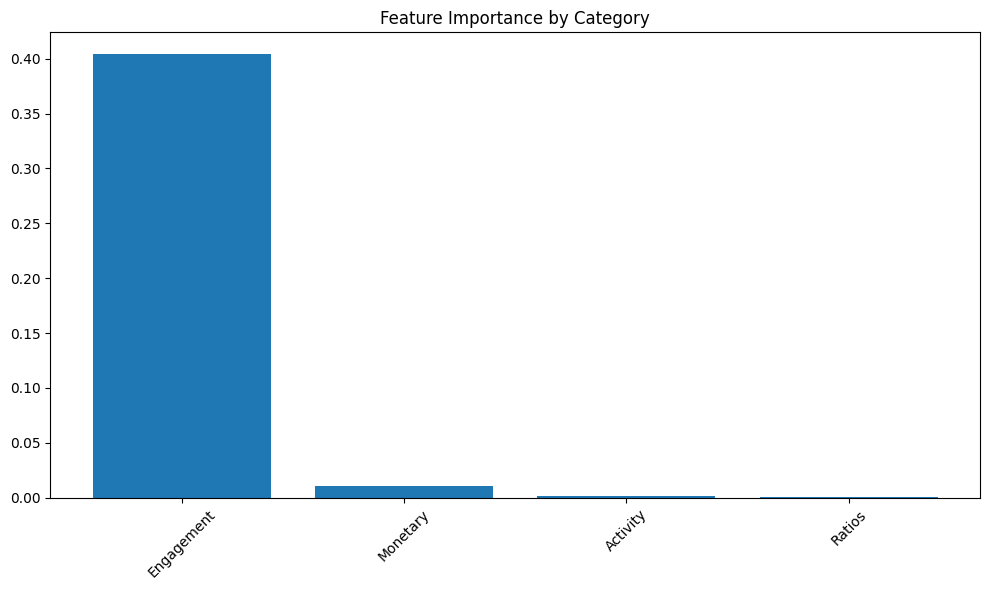

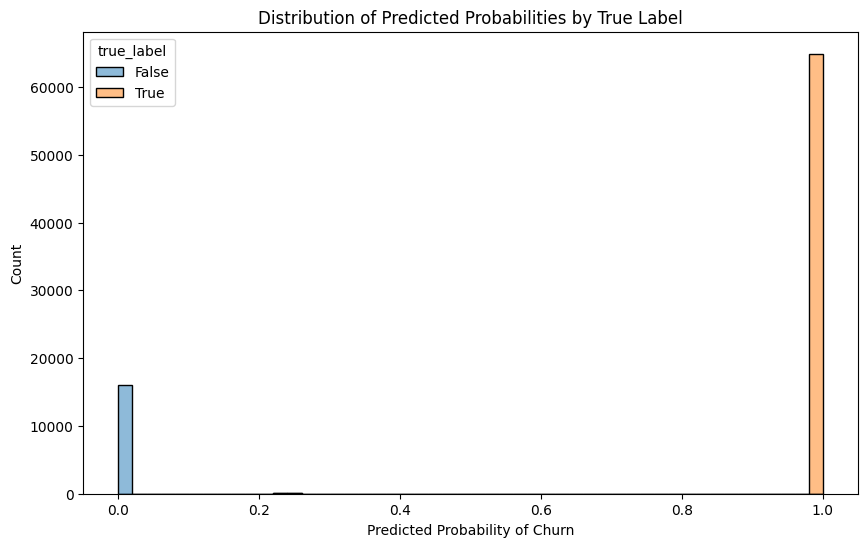

In [32]:
# 1. Complete model evaluation
eval_results = evaluate_model_performance(model, X_test_scaled, y_test, X_train_scaled, y_train)

# 2. Analyze feature importance and behavioral patterns
category_importance = analyze_feature_importance(model, X, feature_importance)

# 3. Analyze prediction patterns
prediction_analysis = analyze_prediction_patterns(
    X_test_scaled, 
    y_test, 
    eval_results['predictions'], 
    eval_results['probabilities'], 
    feature_importance
)

In [33]:
# 1. Check class distribution first
print("Class Distribution:")
print(y.value_counts(normalize=True))

# 2. Check feature importance to identify potential leaks
print("\nTop 5 Most Important Features:")
print(feature_importance.head())

# 3. Examine temporal feature correlations
temporal_features = ['recency', 'days_since_last_event', 'days_since_first_event']
correlations = X[temporal_features].corrwith(y)
print("\nTemporal Feature Correlations with Target:")
print(correlations)

Class Distribution:
churned
True     0.802886
False    0.197114
Name: proportion, dtype: float64

Top 5 Most Important Features:
                   feature  importance
3                  recency    0.402021
12   days_since_last_event    0.378852
11  days_since_first_event    0.201187
0              total_spend    0.006068
5        spend_per_session    0.004809

Temporal Feature Correlations with Target:
recency                   0.691676
days_since_last_event     0.691676
days_since_first_event    0.678028
dtype: float64


## logistic regression


In [52]:

data = pd.read_csv('feature_engineered_users.csv')


In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 407237 entries, 0 to 407236
Data columns (total 18 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   user_id                      407237 non-null  int64  
 1   total_spend                  407237 non-null  float64
 2   frequency                    407237 non-null  int64  
 3   first_event                  407237 non-null  object 
 4   last_event                   407237 non-null  object 
 5   session_count                407237 non-null  int64  
 6   recency                      407237 non-null  int64  
 7   average_time_between_visits  140743 non-null  float64
 8   spend_per_session            407237 non-null  float64
 9   cart                         407237 non-null  int64  
 10  purchase                     407237 non-null  int64  
 11  view                         407237 non-null  int64  
 12  view_to_cart_ratio           407237 non-null  float64
 13 

In [55]:
#print("Missing values:\n", data.isnull().sum())
print(data[['average_time_between_visits', 'churned']].corr())

                             average_time_between_visits   churned
average_time_between_visits                     1.000000 -0.087108
churned                                        -0.087108  1.000000


In [56]:
data.drop(columns=['average_time_between_visits'], inplace=True)


In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 407237 entries, 0 to 407236
Data columns (total 17 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   user_id                 407237 non-null  int64  
 1   total_spend             407237 non-null  float64
 2   frequency               407237 non-null  int64  
 3   first_event             407237 non-null  object 
 4   last_event              407237 non-null  object 
 5   session_count           407237 non-null  int64  
 6   recency                 407237 non-null  int64  
 7   spend_per_session       407237 non-null  float64
 8   cart                    407237 non-null  int64  
 9   purchase                407237 non-null  int64  
 10  view                    407237 non-null  int64  
 11  view_to_cart_ratio      407237 non-null  float64
 12  cart_to_purchase_ratio  407237 non-null  float64
 13  inactive                407237 non-null  bool   
 14  low_spending        

In [58]:
print("Missing values:\n", data.isnull().sum())

Missing values:
 user_id                   0
total_spend               0
frequency                 0
first_event               0
last_event                0
session_count             0
recency                   0
spend_per_session         0
cart                      0
purchase                  0
view                      0
view_to_cart_ratio        0
cart_to_purchase_ratio    0
inactive                  0
low_spending              0
low_frequency             0
churned                   0
dtype: int64


In [59]:
# Check for duplicate rows
duplicate_rows = data[data.duplicated()]

# Display duplicate rows
print(f"Number of duplicate rows: {duplicate_rows.shape[0]}")


Number of duplicate rows: 0


In [60]:
# Define features (X) and target (y)
X = data.drop(columns=['churned', 'user_id', 'first_event', 'last_event'])  # Drop target and irrelevant columns
y = data['churned']

# One-hot encoding for categorical features (if any)
X = pd.get_dummies(X, drop_first=True)

# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize and train the model
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)

# Predictions
y_pred_lr = lr_model.predict(X_test)

# Evaluate
print("Logistic Regression")
print(classification_report(y_test, y_pred_lr))
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr):.2f}")


Logistic Regression
              precision    recall  f1-score   support

       False       0.94      0.70      0.80     16055
        True       0.93      0.99      0.96     65393

    accuracy                           0.93     81448
   macro avg       0.93      0.84      0.88     81448
weighted avg       0.93      0.93      0.93     81448

Accuracy: 0.93


c:\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [62]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the model
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate
print("Random Forest")
print(classification_report(y_test, y_pred_rf))
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.2f}")

Random Forest
              precision    recall  f1-score   support

       False       1.00      1.00      1.00     16055
        True       1.00      1.00      1.00     65393

    accuracy                           1.00     81448
   macro avg       1.00      1.00      1.00     81448
weighted avg       1.00      1.00      1.00     81448

Accuracy: 1.00


#  Model Evaluaton

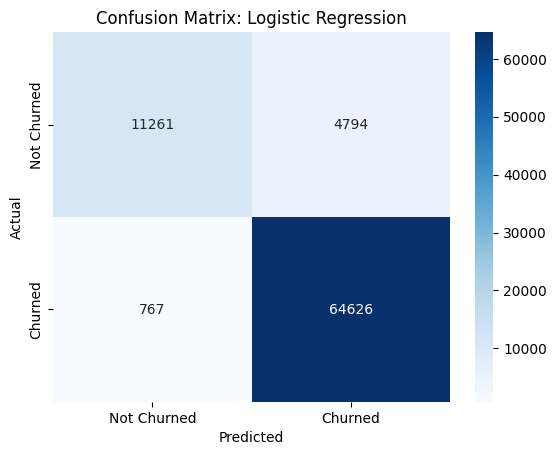

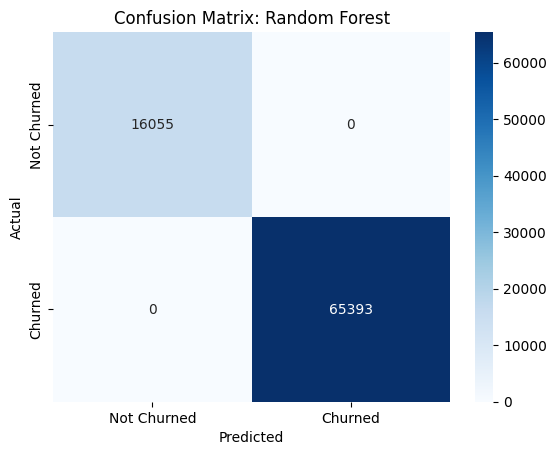

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Churned', 'Churned'], yticklabels=['Not Churned', 'Churned'])
    plt.title(f'Confusion Matrix: {title}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Logistic Regression
plot_confusion_matrix(y_test, y_pred_lr, 'Logistic Regression')

# Random Forest
plot_confusion_matrix(y_test, y_pred_rf, 'Random Forest')




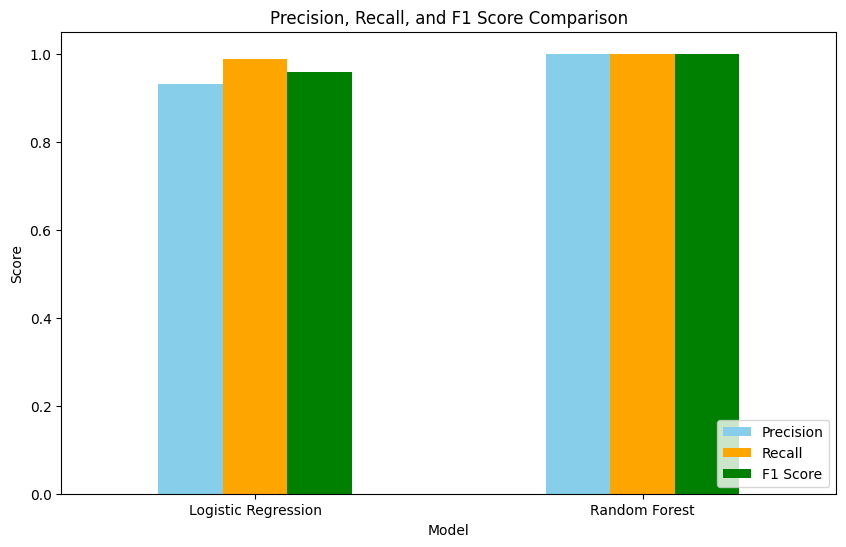

In [70]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Collect metrics for each model
metrics = {
    'Model': ['Logistic Regression', 'Random Forest'],
    'Precision': [
        precision_score(y_test, y_pred_lr),
        precision_score(y_test, y_pred_rf)
    
    ],
    'Recall': [
        recall_score(y_test, y_pred_lr),
        recall_score(y_test, y_pred_rf)
        
    ],
    'F1 Score': [
        f1_score(y_test, y_pred_lr),
        f1_score(y_test, y_pred_rf)
      
    ]
}

import pandas as pd

# Create a DataFrame for visualization
metrics_df = pd.DataFrame(metrics)

# Plot metrics
metrics_df.set_index('Model').plot(kind='bar', figsize=(10, 6), color=['skyblue', 'orange', 'green'])
plt.title('Precision, Recall, and F1 Score Comparison')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.legend(loc='lower right')
plt.show()


In [69]:
for key, value in metrics.items():
    print(f"{key}: {len(value)}")

Model: 3
Precision: 2
Recall: 2
F1 Score: 2


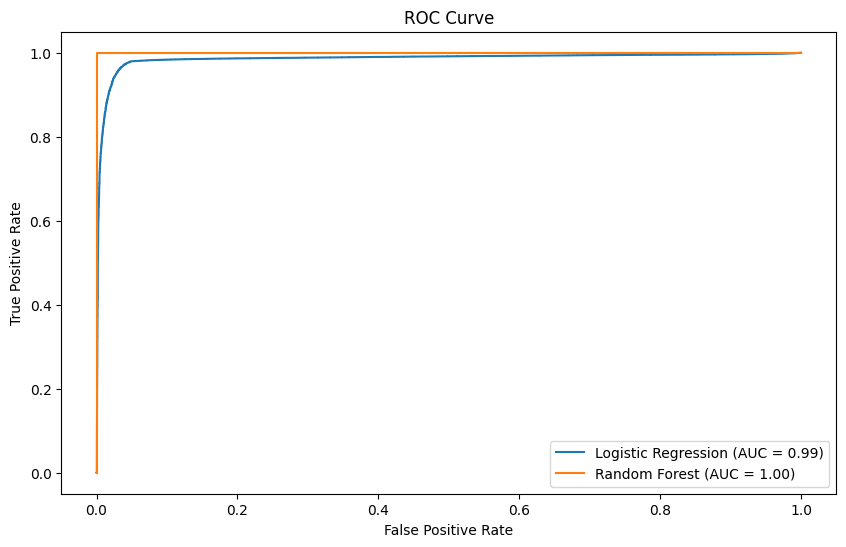

In [71]:
from sklearn.metrics import roc_curve, roc_auc_score

# Function to plot ROC curve
def plot_roc_curve(y_true, y_probs, model_name):
    fpr, tpr, _ = roc_curve(y_true, y_probs)
    auc_score = roc_auc_score(y_true, y_probs)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc_score:.2f})')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')

# Plot all models
plt.figure(figsize=(10, 6))
plot_roc_curve(y_test, lr_model.predict_proba(X_test)[:, 1], 'Logistic Regression')
plot_roc_curve(y_test, rf_model.predict_proba(X_test)[:, 1], 'Random Forest')

plt.show()


# Interpretation & Explanation

## 1. Feature Importance Plot

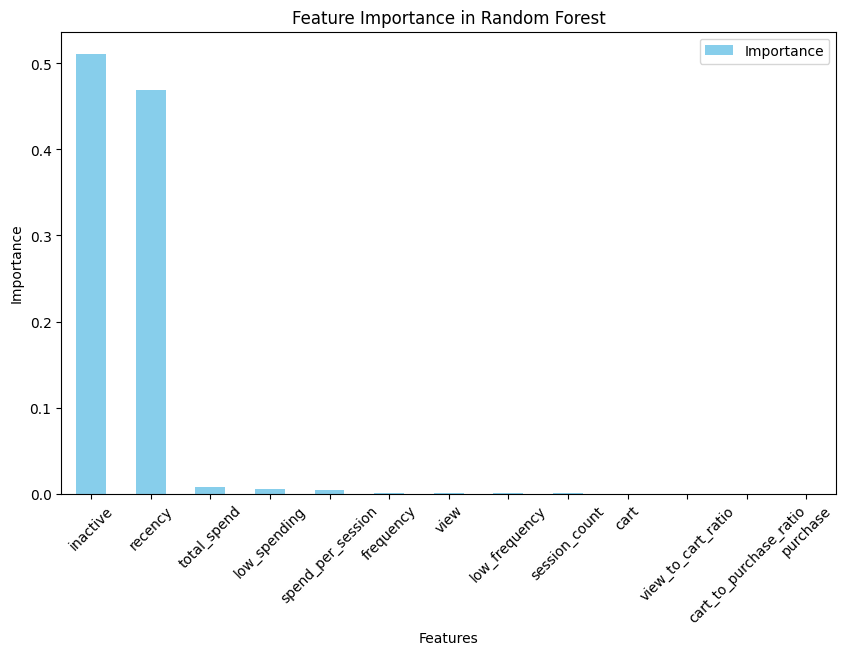

In [72]:
import matplotlib.pyplot as plt
import pandas as pd

# For Random Forest Model
importances = rf_model.feature_importances_  # assuming rf_model is your trained Random Forest model
features = X_train.columns  # your feature set

# Create a DataFrame for easier plotting
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot
importance_df.plot(kind='bar', x='Feature', y='Importance', figsize=(10, 6), color='skyblue')
plt.title('Feature Importance in Random Forest')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45)
plt.show()


the graph shows the most dependable attribute is inactive following with recency thus inactive and recency is the most deciding  factor the churn 

## 2. Partial Dependence Plot (PDP)

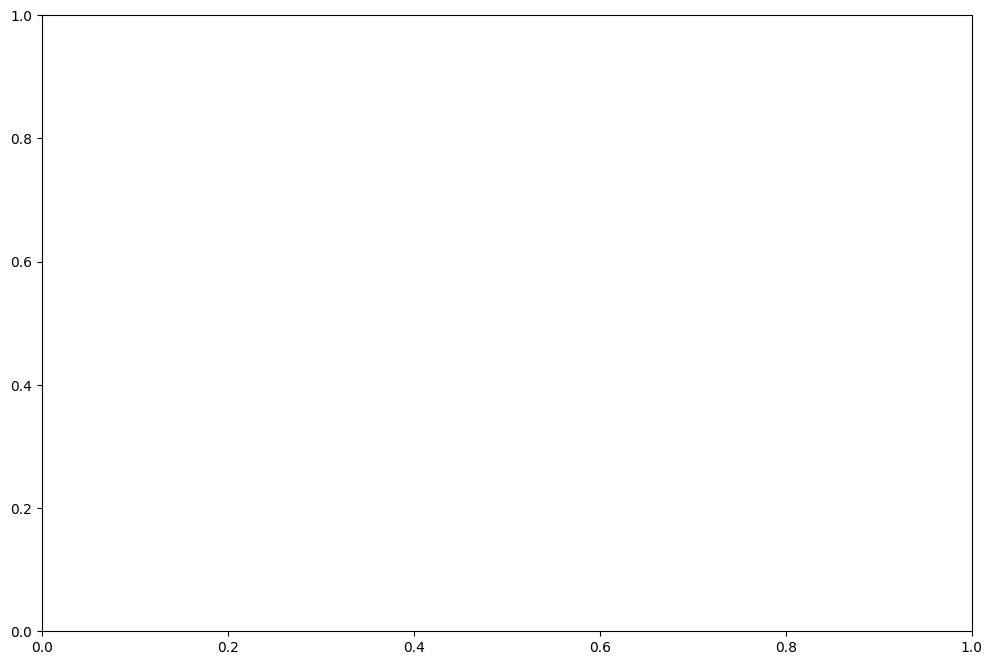

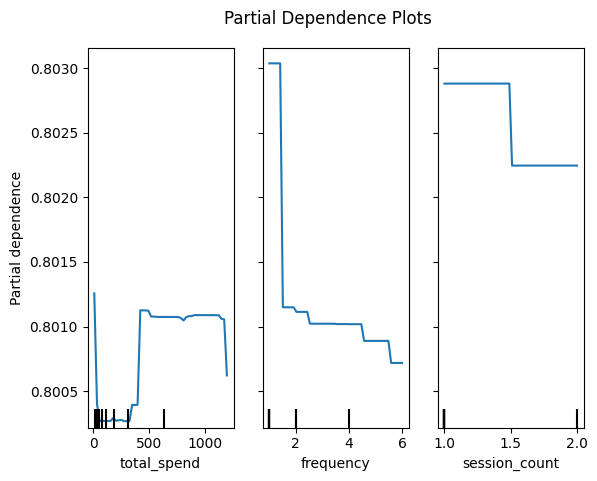

In [75]:
from sklearn.inspection import PartialDependenceDisplay

# For Random Forest Model
# You can specify the features of interest in the 'features' argument
fig, ax = plt.subplots(figsize=(12, 8))
display = PartialDependenceDisplay.from_estimator(rf_model, 
                                                  X_train, 
                                                  features=[0, 1, 2],  # Example features, modify based on your dataset
                                                  feature_names=X_train.columns, 
                                                  grid_resolution=50)
plt.suptitle('Partial Dependence Plots')
plt.subplots_adjust(top=0.9)
plt.show()



In [74]:
import shap

# Assuming you have trained a Random Forest model (rf_model)
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X_train)

# Plot SHAP summary plot
shap.summary_plot(shap_values[1], X_train)  # 1 corresponds to the 'True' class (churned users)


ModuleNotFoundError: No module named 'shap'